# Clasificacion y explicabilidad

## Explicabilidad

AAE para entrenar un espacio latente para explicar el resultado de la clasificacion.

### Preparacion de los datos

In [1]:
from lib.utilities import unpickle, tryDataset, mkfolders, os, compute_mixture, load_mixture

(50000, 32, 32, 3)


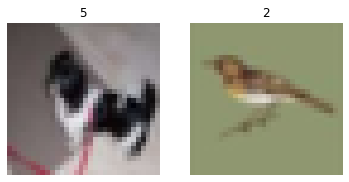

(10000, 32, 32, 3)


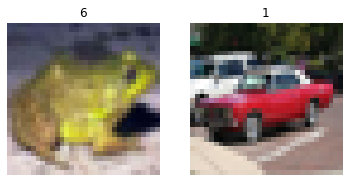

In [2]:
X_train = unpickle("Input\cifar-10-train")
X_test = unpickle("Input\cifar-10-test")
tryDataset(X_train)
tryDataset(X_test)

Tamaño de las imagenes:

In [3]:
img_shape = X_train["data"][0].shape

### Entrenamiento

#### Persistencia

In [1]:
_raiz = "Resultados/CIFAR10_ClasifExpl"
_nombre = "CIFAR10"

Creamos las carpetas para almacenar el output

In [5]:
mkfolders(_raiz, True)

Carpeta Resultados/CIFAR10_ClasifExpl ya existe


#### Entrenamiento en grid

In [6]:
from lib.discriminadores import build_class_discriminator
from lib.genEJ import true_multivariate_sampler_tf, fake_class_sampler
from keras import losses

In [7]:
from lib.compilado import assemble_AAE_twoPhased
from lib.entrenamiento import fit_AAE_twoPhased
from lib.convolucional import build_conv_decoder, build_conv_encoder
from lib.muestreo import show_prevResults, plot_history, sample_imgs, exploraLatente

In [8]:
epochs = 12

In [9]:
def tryModel(
    model_name="MODEL", 
    assemble_AAE=assemble_AAE_twoPhased,
    loss_weights=[0.999, 0.001], 
    fit_AAE = fit_AAE_twoPhased,
    enc= (build_conv_encoder, "conv_enc", {}), 
    dec = (build_conv_decoder,"conv_dec", {}),
    ae_loss = (losses.mean_squared_error, "ae_MSE_loss"),
    disc = (build_class_discriminator ,"class_disc", {"clases":10}, {"truth":true_multivariate_sampler_tf, "truth_kwargs":{"nclases":10}, "falsehood":fake_class_sampler}),
    disc_loss = (losses.binary_crossentropy, "disc_binXentropy_loss"),
    dim_latente = 512,
    save=False
    ):
    # Carpeta donde almacenar los resultados
    ruta = _raiz+"\\"+model_name
    # Si existen los modelos solo mostrar resultados guardados sin entrenar
    if os.path.isfile(ruta+"/Modelos\\decoder.h5"):
        print(ruta+" ya ha sido entrenada")
        show_prevResults(ruta, epochs=epochs)
        return
    # Crear carpeta
    mkfolders(ruta, True)
    # Parametros para el entrenamiento
    fit_settings = disc[3]
    # Creacion de los modelos
    aae = assemble_AAE(dim_latente, img_shape, enc_model = enc[0], enc_kwargs=enc[2], dec_model = dec[0], dec_kwargs=dec[2], disc_model = disc[0], disc_kwargs=disc[2], ae_loss=ae_loss[0], disc_loss=disc_loss[0], loss_weights=loss_weights)
    # Entrenamiento
    history = fit_AAE(aae=aae, dim_latente=dim_latente, dataset=X_train, epochs = epochs, ruta = ruta, **fit_settings)
    # Obtenemos informacion del numero de clases para mostrar resultados
    clases=0
    if "clases" in disc[2].keys():
        clases=disc[2]["clases"]
    
    #Resultados
    print("Historia del entrenamiento:")
    plot_history(history, ruta=ruta, title=ruta)
    print("Imagenes regeneradas desde el set de entrenamiento (arriba originales):")
    sample_imgs(X_train, aae[3], epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TRAINSET")
    print("Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):")
    sample_imgs(X_test, aae[3], epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TESTSET")
    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):")
    exploraLatente(aae[0], aae[1], "Input\cifar-10-groupedtrain", ruta=ruta, nombre="GenFromLatentTRAINSET")
    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):")
    exploraLatente(aae[0], aae[1], "Input\cifar-10-groupedtest", ruta=ruta, nombre="GenFromLatentTESTSET")
    # Guardado de modelos
    if save:
        mkfolders(ruta+"/Modelos")
        aae[0].save(ruta+"/Modelos\\encoder.h5")
        aae[1].save(ruta+"/Modelos\\decoder.h5")
        #aae[3].save(ruta+"/Modelos\\autoencoder.h5")


In [5]:
model_name = "ConvAAE"

Carpeta Resultados/CIFAR10_ClasifExpl\ConvAAE ya existe
Entrenando: Resultados/CIFAR10_ClasifExpl\ConvAAE
E0 <██████████> 100% DISC: [loss: 0.010095, acc: 100.00%] AAE: [mse: 0.019154, b_ce: 0.014458] 119.21s		
E1 <██████████> 100% DISC: [loss: 0.005388, acc: 100.00%] AAE: [mse: 0.025174, b_ce: 0.012333] 115.57s		
E2 <██████████> 100% DISC: [loss: 0.020977, acc: 100.00%] AAE: [mse: 0.015547, b_ce: 0.010938] 116.82s		
E3 <██████████> 100% DISC: [loss: 0.460421, acc: 76.50%] AAE: [mse: 0.037484, b_ce: 0.021310] 116.32s		
E4 <██████████> 100% DISC: [loss: 0.015784, acc: 100.00%] AAE: [mse: 0.014809, b_ce: 0.008159] 116.75s		
E5 <██████████> 100% DISC: [loss: 0.127244, acc: 93.50%] AAE: [mse: 0.017332, b_ce: 0.008762] 116.73s		
E6 <██████████> 100% DISC: [loss: 0.229360, acc: 95.00%] AAE: [mse: 0.014377, b_ce: 0.008888] 115.84s		
E7 <██████████> 100% DISC: [loss: 0.069860, acc: 95.00%] AAE: [mse: 0.018369, b_ce: 0.011837] 116.42s		
E8 <██████████> 100% DISC: [loss: 0.068768, acc: 96.50%] A

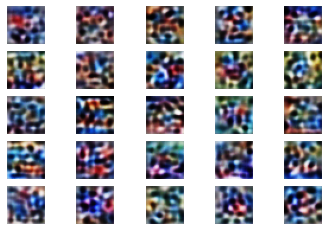

Historia del entrenamiento:


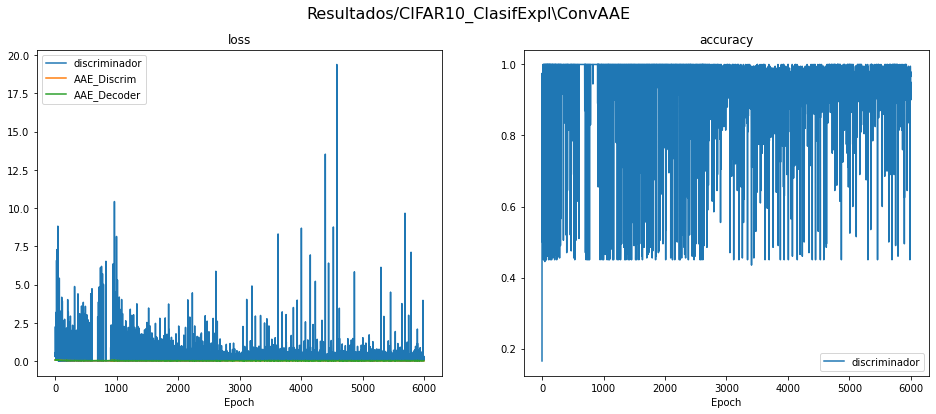

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


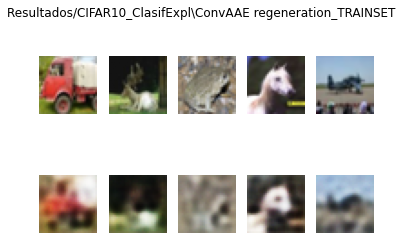

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


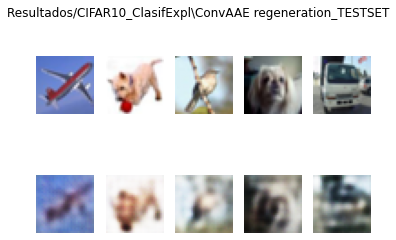

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


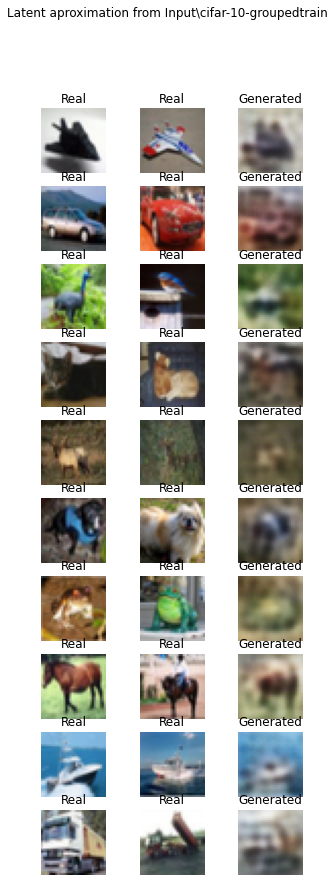

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


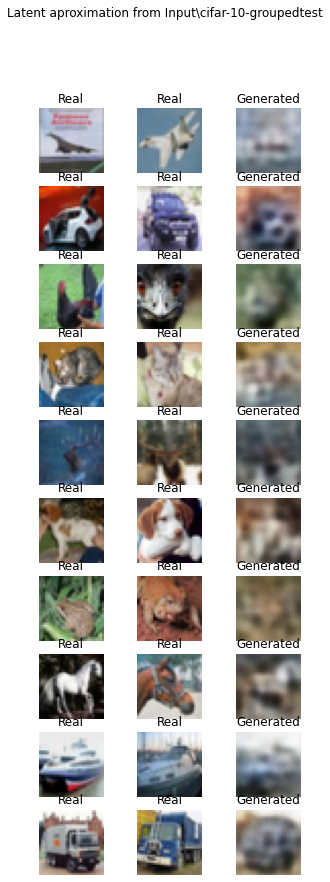

In [11]:
tryModel(model_name=model_name, save=True)

## Clasificacion   

Carga del encoder

In [3]:
import tensorflow as tf

In [17]:
encoder = tf.keras.models.load_model(_raiz+"\\"+model_name+"/Modelos\\encoder.h5")

for l in encoder.layers:
    l.trainable=False
encoder.add(tf.keras.layers.Dense(10, activation="softmax"))
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 512)              